In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [380]:
train_df = pd.read_csv('./data/churn_train.csv')
test_df = pd.read_csv('./data/churn_test.csv')

# ● Analysera datan

In [381]:
train_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [382]:
test_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [383]:
train_df.duplicated().sum()

0

In [384]:
test_df.duplicated().sum()

0

In [385]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


# ● Förbered datan för att kunna användas av modellen

## ○ Finns det data som ej borde användas?

### Eftersom att customerID attributet inte spelar någon roll i hurvida en kund lämnar eller ej så kommer jag droppa den.

In [386]:
train_df = train_df.drop(columns=['customerID'])
test_df = test_df.drop(columns=['customerID'])

### Nu kommer jag att titta lite närmare på statistiken för varje kolumn mellan dens egenskaper och om en kund churnar eller inte. Och utifrån detta ska jag försöka få fram om det finns attribut som kan vara värda att plocka bort. Jag kommer sedan att behålla original datasetet intakt men skapa upp ett nytt med attribut som jag finner vara ovärda att ha med och sedan jämföra scoren och se om det var bra eller inte att plocka bort attribut.

In [387]:
def plot_difference_in_yes_or_no(column):
    churn_yes_counts = train_df[train_df['Churn']=='Yes'][column].value_counts()
    churn_no_counts = train_df[train_df['Churn']=='No'][column].value_counts()
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].pie(churn_yes_counts.values, labels=churn_yes_counts.index, autopct='%1.1f%%')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Count')
    ax[0].set_title(f'Count of {column} for Churn = Yes')

    ax[1].pie(churn_no_counts.values, labels=churn_no_counts.index, autopct='%1.1f%%')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Count')
    ax[1].set_title(f'Count of {column} for Churn = No')

    plt.tight_layout()
    plt.show()

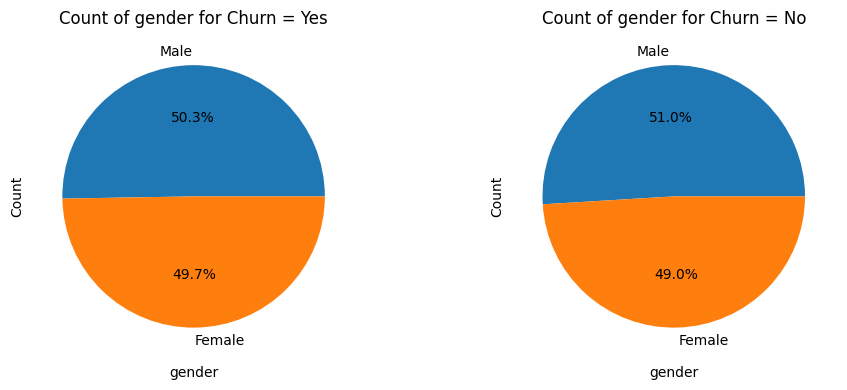

In [388]:
plot_difference_in_yes_or_no(train_df.columns[0])

### Som vi ser på gender attributet så har den inte alls stor skillnad på om en kund churnar eller inte så detta är en kandidat som jag kommer välja att plocka bort.

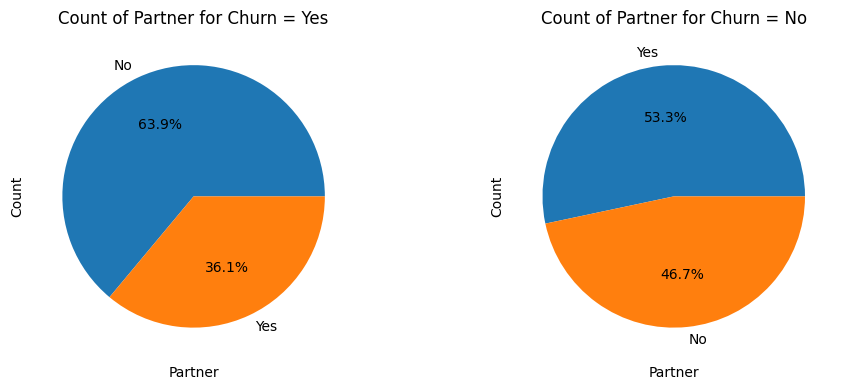

In [389]:
plot_difference_in_yes_or_no(train_df.columns[2])

### Om en kund har en partner eller ej verkar ändå skilja sig lite, denna kommer jag välja att ha kvar.

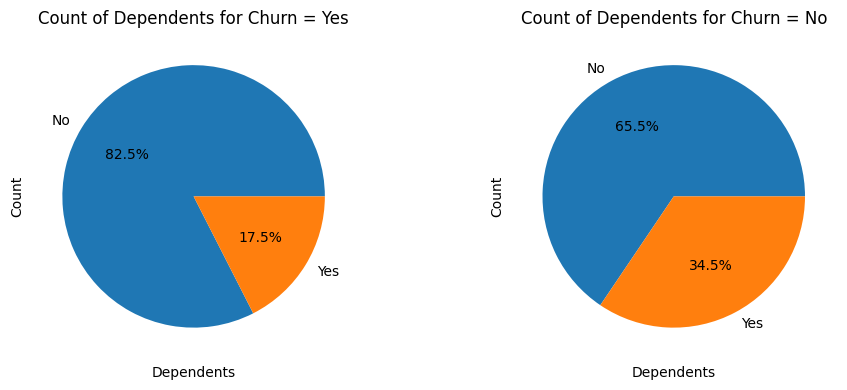

In [390]:
plot_difference_in_yes_or_no(train_df.columns[3])

### Dependents verkar också skilja sig lite, jag väljer att även spara denna.

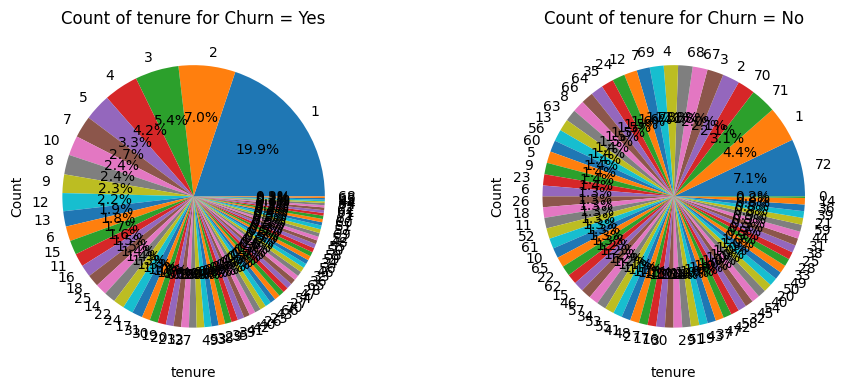

In [391]:
plot_difference_in_yes_or_no(train_df.columns[4])

### Denna är väldigt rörigt och jag kommer välja att låta den vara utan att skapa upp någon ny funktion för jag tycker att jag får ut vad jag vill ha från den.
### Intressant att se att dom som lämnar så är det som flest efter en månad och sedan när antalet månader ökar så minskar också antalet som lämnar. Vilket vi även ser på dom som stannar kvar att högst antal är dom som varit kunder i 72 månader. Denna kommer jag inte röra.

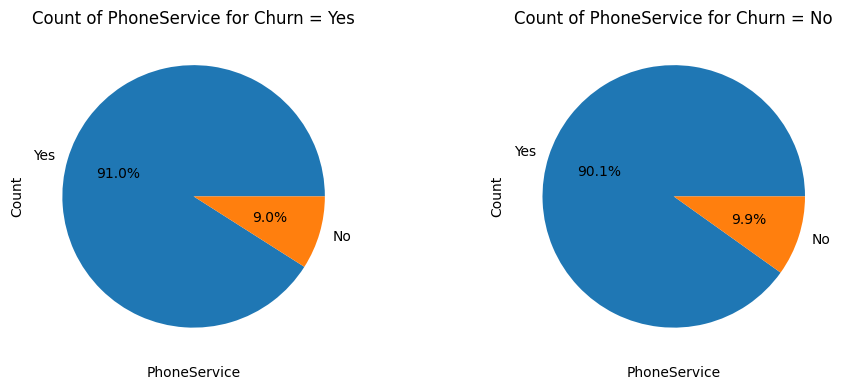

In [392]:
plot_difference_in_yes_or_no(train_df.columns[5])

### Denna precis som gender händer nästan ingenting alls, därför kommer jag plocka bort denna.

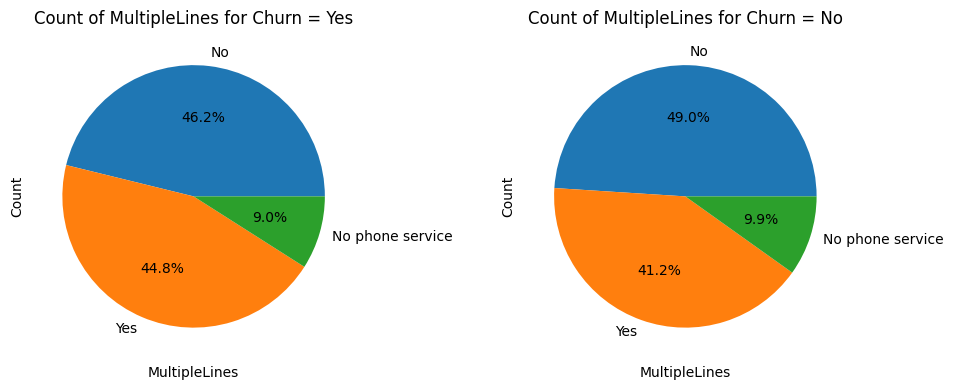

In [393]:
plot_difference_in_yes_or_no(train_df.columns[6])

### Även här så händer ingen större skillnad, så kommer plocka bort denna.

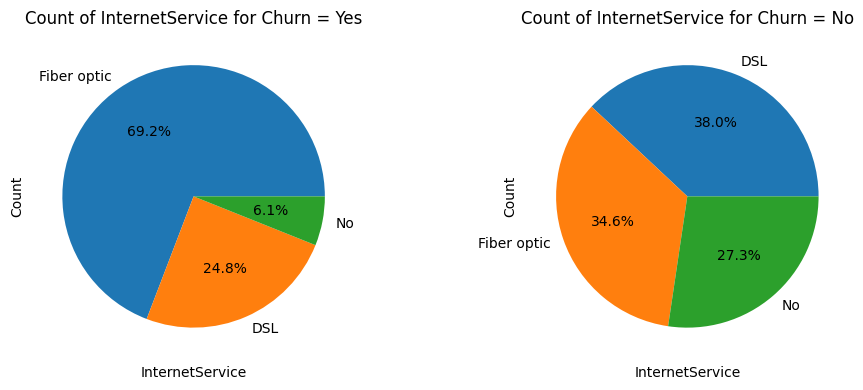

In [394]:
plot_difference_in_yes_or_no(train_df.columns[7])

### Här är ändå lite som händer, jag behåller den eftersom att jag finner det intressant att det är så stor skillnad på att inte ha InternetService för dom som är kvar/lämnar.

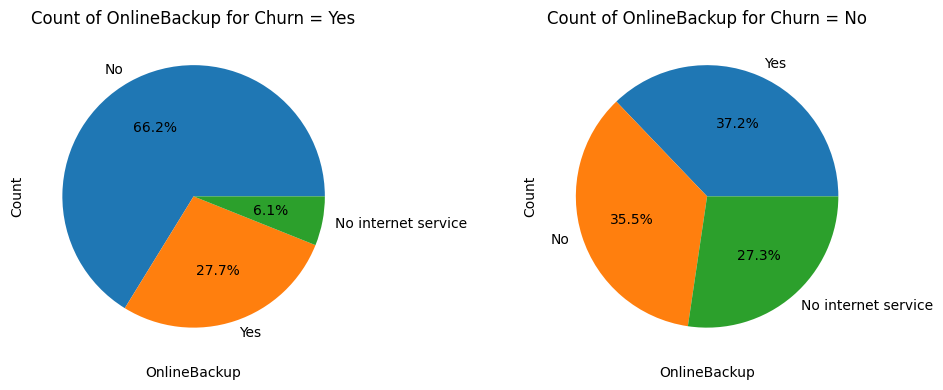

In [395]:
plot_difference_in_yes_or_no(train_df.columns[9])

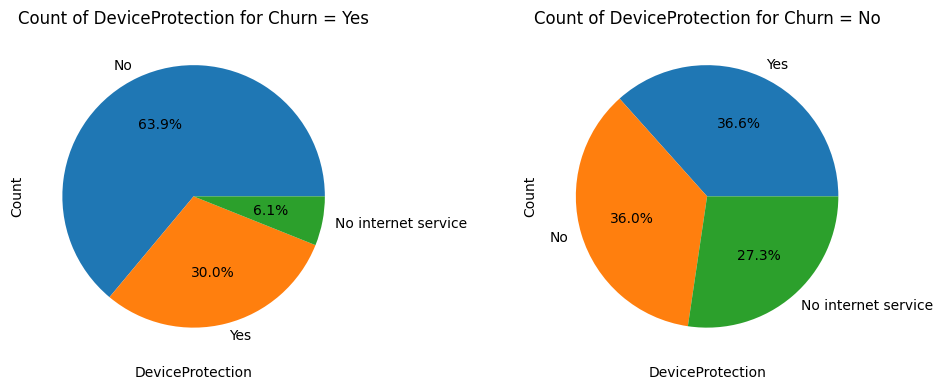

In [396]:
plot_difference_in_yes_or_no(train_df.columns[10])

### OnlineBackup och OnlineProtection har mer eller mindre nästan samma värden, jag kommer välja att behålla enbart en av dom och det blir OnlineBackup eftersom att den har mer NO bland dom som lämnar och detta tror jag hjälper just minoritetstargeten senare.

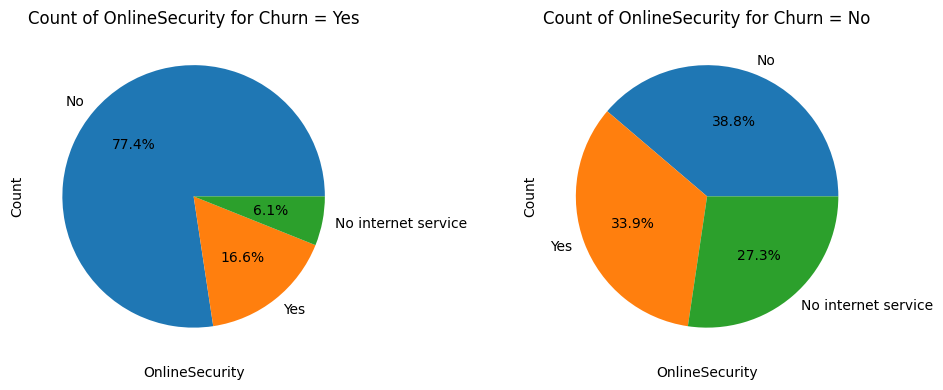

In [397]:
plot_difference_in_yes_or_no(train_df.columns[8])

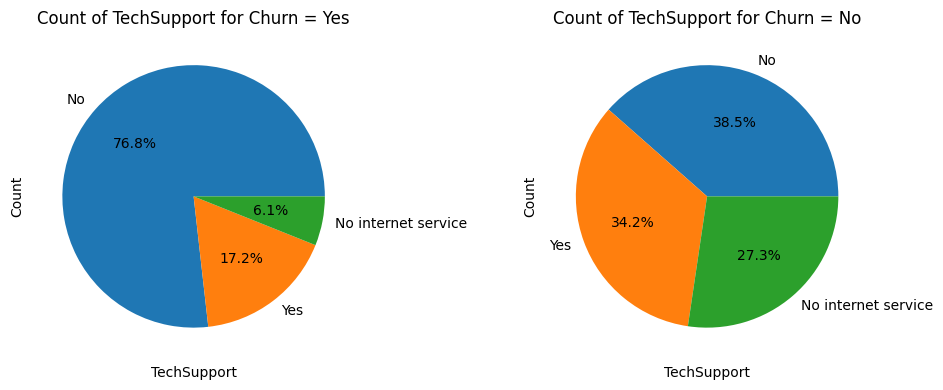

In [398]:
plot_difference_in_yes_or_no(train_df.columns[11])

### OnlineSecurity och TechSupport har även dom väldigt liknande värden, jag kommer även här välja att behålla en av dom och med samma princip som tidigare så tar jag den med flest NO hos dom som lämnar, vilket då blir att behålla OnlineSecurity.

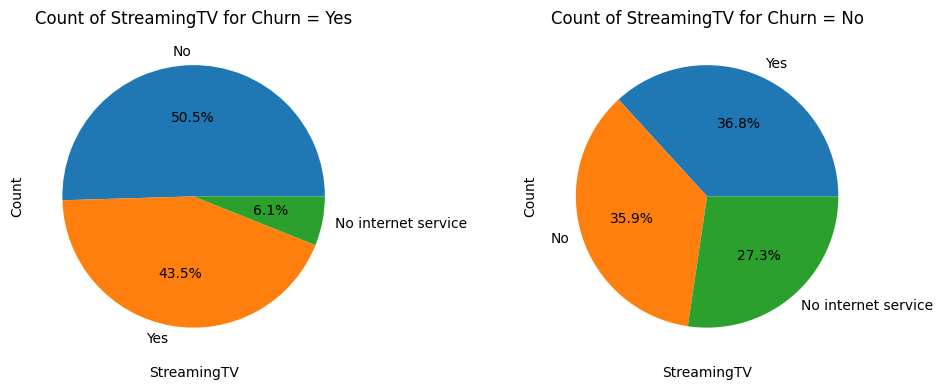

In [399]:
plot_difference_in_yes_or_no(train_df.columns[12])

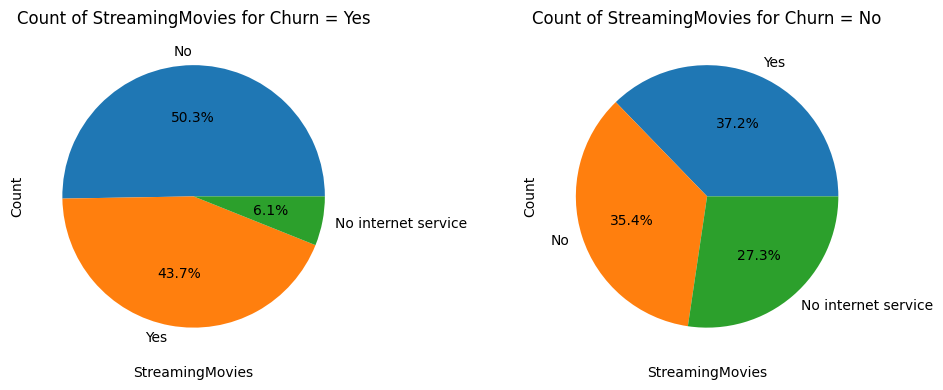

In [400]:
plot_difference_in_yes_or_no(train_df.columns[13])

### Även mellan StreamingMovies och StreamingTV så är det väldigt jämnt, känns nästan som att detta är något inbyggt för kunden att man har bägge så jag kommer ta bort StreamingTV.

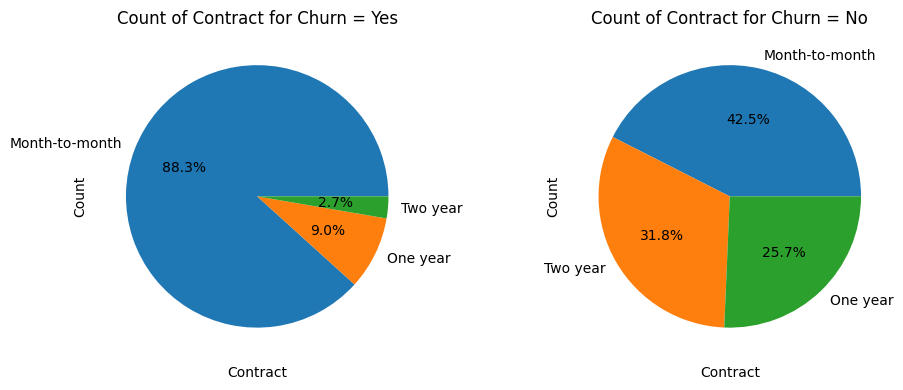

In [401]:
plot_difference_in_yes_or_no(train_df.columns[14])

### Den här är lite som med hur länge en kund har varit kund eftersom att en kund kommer ju antagligen inte koppla upp sig på en lång betalningsplan om den är osäker, och eftersom att majoriteten lämnar inom några månader så kunde man misstänka att denna skulle se ut som den gör, denna tror jag har en stor betydelse. 

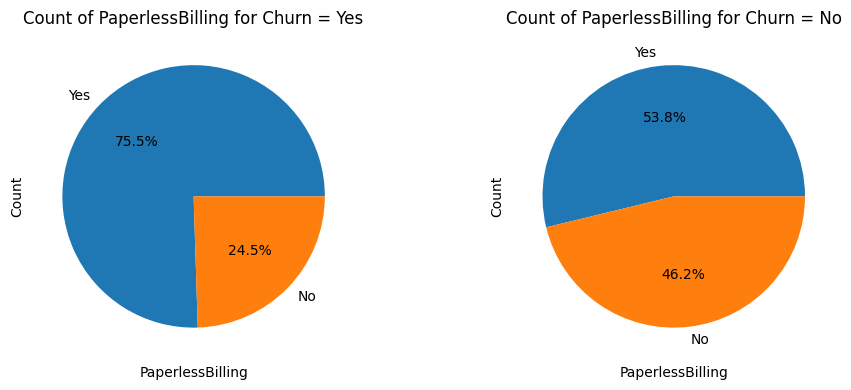

In [402]:
plot_difference_in_yes_or_no(train_df.columns[15])

### Om kunder får PaperlessBilling eller inte så är det mycket som händer, låter danna vara kvar.

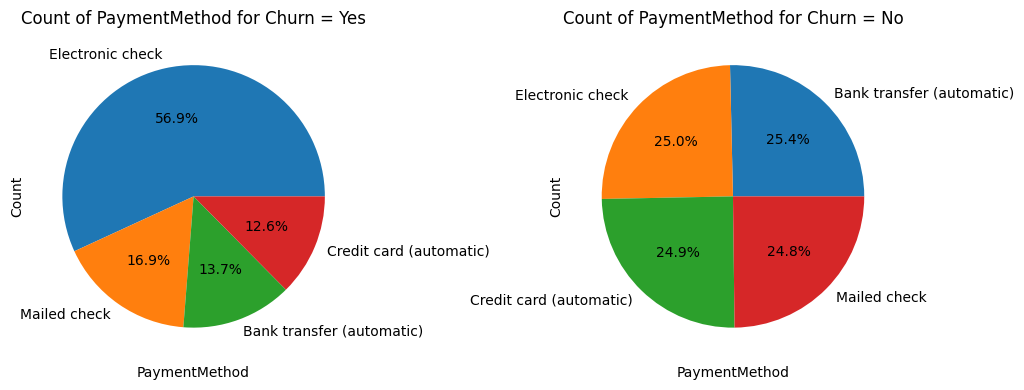

In [403]:
plot_difference_in_yes_or_no(train_df.columns[16])

### Här är det intressant att se att det är väldigt jämn fördelning bland betalningssätten hos dom som stannar, men dom som lämnar är majoriteten utan att ha automatisk betalning. Denna finner jag väldigt intressant och kommer ha kvar.

### Dom attribut som jag har valt att plocka bort för att se om det gör skillnad i modellen är: gender, PhoneService, MultipleLines, InternetService, DeviceProtection ,TechSupport och StreamingTV, detta kommer jag att göra lite längre ner efter jag har ändrat TotalCharges.

In [404]:
drop_columns = ['gender','PhoneService','MultipleLines','DeviceProtection' ,'TechSupport','StreamingTV']

## ○ Det finns en hel del textdata som måste behandlas på något vis (finns flera olika alternativ, där vissa metoder är mer lämpade för neurala nätverk).

In [405]:
train_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### En observation efter att ha sett att TotalCharges är ett object men i datasetet verkar den innehålla floats precis som MonthlyCharges men att det är totalt vad kunden betalat i avgifter, när jag försökte göra om den till float så får jag error, jag skapar en funktion för att ta fram vad det är för värden och hur många som inte går att konvertera.

In [406]:
def can_convert(value):
    try:
        float(value)
        return True
    except:
        return False

In [407]:
train_unconvertable = []
for v in train_df['TotalCharges']:
    if can_convert(v) == False:
        train_unconvertable.append(v)

In [408]:
test_unconvertable = []
for v in test_df['TotalCharges']:
    if can_convert(v) == False:
        test_unconvertable.append(v)

In [409]:
print('Unconvertable in train set: ',train_unconvertable)
print('Count: ', len(train_unconvertable))

Unconvertable in train set:  [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
Count:  8


In [410]:
print('Unconvertable in test set: ',test_unconvertable)
print('Count: ', len(test_unconvertable))

Unconvertable in test set:  [' ', ' ', ' ']
Count:  3


### Nu ser jag att samtliga värden som inte går att konvertera till float är tomma string rader, jag väljer att byta ut dom till 0 eftersom att det ska betyda att kunden inte blivit debiterad någonting ännu, och detta kommer bli bättre för min egna encoder senare. Men eftersom att jag gör så med träningsdatan så behöver jag även göra det med testdatan. Man ska ju inte ändra i testdatan utan låta den vara intakt, men jag känner att detta inte gör någon skillnad då en tom string är samma sak som att den hade varit 0.

In [411]:
train_df.loc[train_df['TotalCharges'] == ' ', 'TotalCharges'] = 0
test_df.loc[test_df['TotalCharges'] == ' ', 'TotalCharges'] = 0

In [412]:
train_df['TotalCharges'] = train_df['TotalCharges'].astype(float)
test_df['TotalCharges'] = test_df['TotalCharges'].astype(float)

### Eftersom att neurala nätverk gör matematiska beräkningar så är OneHotEncoding ett bättre alternativ.

In [413]:
x_train = train_df.drop(columns='Churn')
y_train = train_df['Churn']

x_test = test_df.drop(columns='Churn')
y_test = test_df['Churn']

x_train_less = x_train.drop(columns=drop_columns)
x_test_less = x_test.drop(columns=drop_columns)

In [414]:
def encode_columns(train_df,test_df):
    columns = train_df.columns
    # train_df_func = train_df.copy()
    # test_df_func = test_df.copy()
    colums_to_transform = []
    for c in columns:
        if train_df[c].dtype == 'object':
            colums_to_transform.append(c)
        elif c == 'SeniorCitizen':
            colums_to_transform.append(c)
        else:
            continue
    train_df_func = pd.get_dummies(train_df,columns=colums_to_transform,dtype=int)
    test_df_func = pd.get_dummies(test_df,columns=colums_to_transform,dtype=int)

    return train_df_func, test_df_func

In [415]:
encoded_x_train, encoded_x_test = encode_columns(x_train,x_test)
encoded_x_train_less, encoded_x_test_less = encode_columns(x_train_less,x_test_less)

In [416]:
scaler = MinMaxScaler()
encoded_x_train = scaler.fit_transform(encoded_x_train)
encoded_x_test = scaler.transform(encoded_x_test)
encoded_x_test = pd.DataFrame(encoded_x_test,columns=scaler.feature_names_in_)
encoded_x_train = pd.DataFrame(encoded_x_train,columns=scaler.feature_names_in_)

In [417]:
scaler = MinMaxScaler()
encoded_x_train_less = scaler.fit_transform(encoded_x_train_less)
encoded_x_test_less = scaler.transform(encoded_x_test_less)
encoded_x_test_less = pd.DataFrame(encoded_x_test_less,columns=scaler.feature_names_in_)
encoded_x_train_less = pd.DataFrame(encoded_x_train_less,columns=scaler.feature_names_in_)

# ● Träna 5 olika neurala nätverk och jämför tiden de tar att träna (låt resten av parametrarna vara default och använd samma random state för att få bättre jämförelse av tiden)

○ 4 gömda lager med 5 neuroner i varje, learning rate 0.01
○ 2 gömda lager med 100 neuroner, learning rate 0.01
○ 10 gömda lager med 100 neuroner i varje, learning rate 0.01
○ 2 gömda lager med 100 neuroner, learning rate 0.0001
○ 2 gömda lager med 100 neuroner, learning rate 0.00001
○ Utvärdera modellerna
■ Beräkna accuracy
■ Rita ut en confusion matrix och analysera hur modellen gör
prediktioner och vilka typer av fel den gör.

In [418]:
def predict_and_paint(model, y_test, x_test):
    predictions = model.predict(x_test)
    lab = y_test.unique()
    lab = sorted(lab)
    cm = confusion_matrix(y_test, predictions, labels=lab)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lab)
    disp.plot()
    plt.show()

## ○ 4 gömda lager med 5 neuroner i varje, learning rate 0.01

### Med alla attribut:

In [419]:
# %%timeit
clf = MLPClassifier(hidden_layer_sizes=(5,5,5,5),learning_rate_init=0.01,random_state=42).fit(encoded_x_train,y_train)

### Träningen av denna tog 0.8s

In [420]:
clf.score(encoded_x_test,y_test)

0.7934705464868701

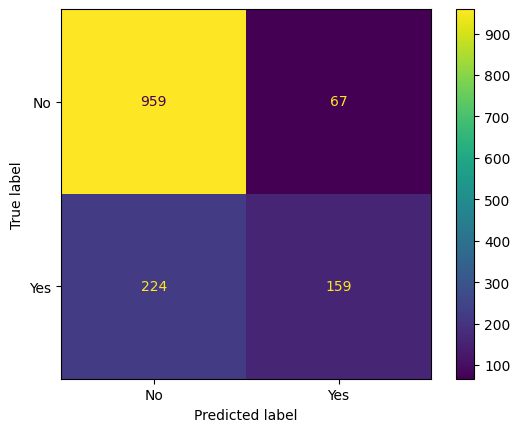

In [421]:
predict_and_paint(clf,y_test, encoded_x_test)

### Med minskat antal attribut:

In [422]:
clf = MLPClassifier(hidden_layer_sizes=(5,5,5,5),learning_rate_init=0.01,random_state=42).fit(encoded_x_train_less,y_train)
clf.score(encoded_x_test_less,y_test)

0.7984386089425124

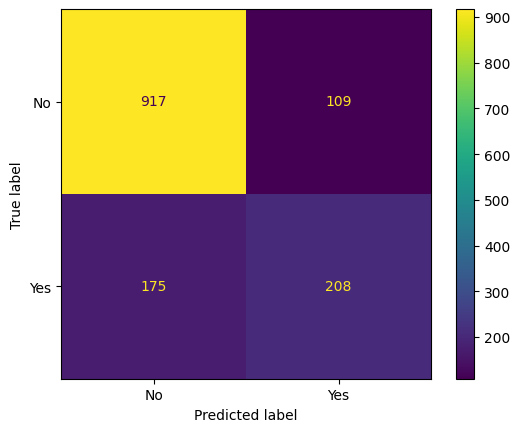

In [423]:
predict_and_paint(clf,y_test, encoded_x_test_less)

## ○ 2 gömda lager med 100 neuroner, learning rate 0.01

### Med alla attribut:

In [424]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.01,random_state=42).fit(encoded_x_train,y_train)

### Träningen av denna tog 9.3s

In [425]:
clf.score(encoded_x_test,y_test)

0.752306600425834

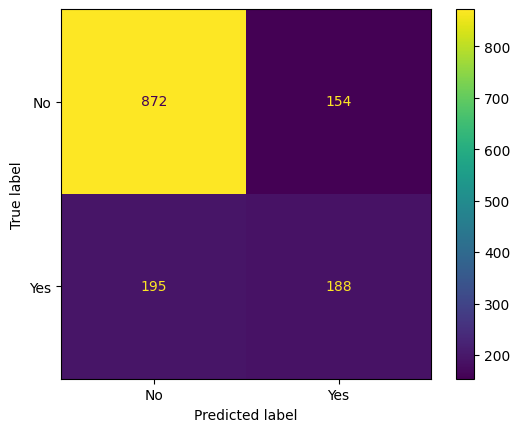

In [426]:
predict_and_paint(clf,y_test, encoded_x_test)

### Med minskat antal attribut:

In [427]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.01,random_state=42).fit(encoded_x_train_less,y_train)
clf.score(encoded_x_test_less,y_test)

0.7601135557132718

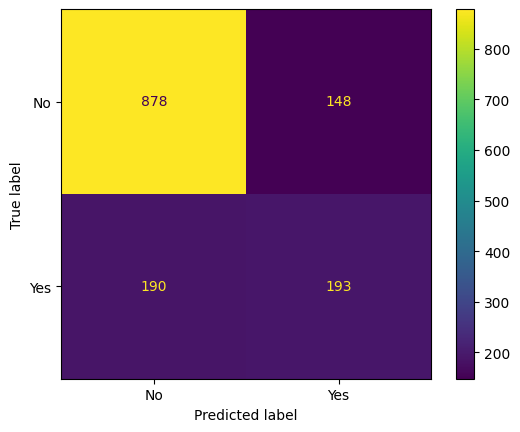

In [428]:
predict_and_paint(clf,y_test, encoded_x_test_less)

## ○ 10 gömda lager med 100 neuroner i varje, learning rate 0.01

### Med alla attribut:

In [450]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100),learning_rate_init=0.01,random_state=42).fit(encoded_x_train,y_train)

### Träningen av denna tog 30.3s

In [451]:
clf.score(encoded_x_test,y_test)

0.7622427253371186

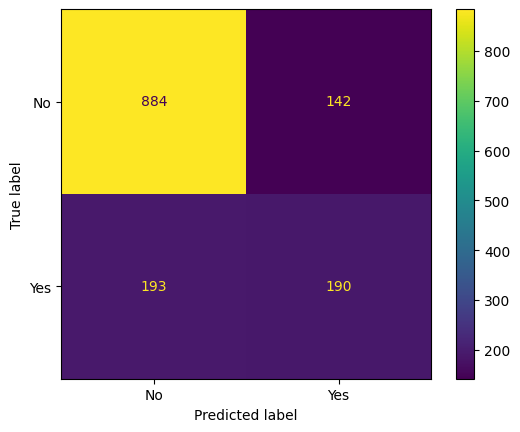

In [452]:
predict_and_paint(clf,y_test, encoded_x_test)

### Med minskat antal attribut:

In [432]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100),learning_rate_init=0.01,random_state=42).fit(encoded_x_train_less,y_train)
clf.score(encoded_x_test_less,y_test)

0.7735982966643009

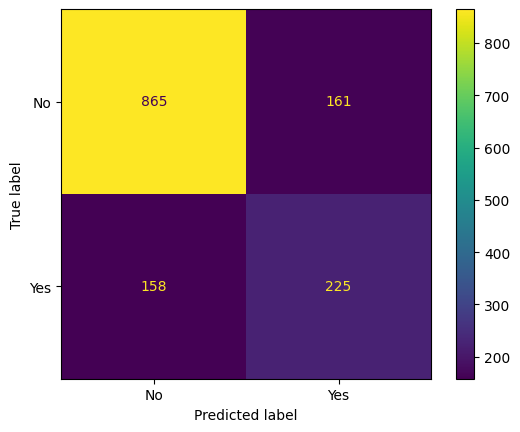

In [433]:
predict_and_paint(clf,y_test, encoded_x_test_less)

## ○ 2 gömda lager med 100 neuroner, learning rate 0.0001

### Med alla attribut:

In [434]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.0001,random_state=42).fit(encoded_x_train,y_train)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Träningen av denna tog 14.8s, men detta efter att den har slutat tidigt pga maxiterationer.

In [435]:
clf.score(encoded_x_test,y_test)

0.7835344215755855

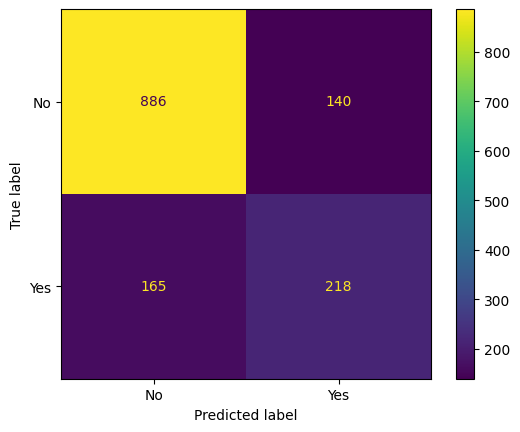

In [436]:
predict_and_paint(clf,y_test, encoded_x_test)

### Med minskat antal attribut:

In [437]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.0001,random_state=42).fit(encoded_x_train_less,y_train)
clf.score(encoded_x_test_less,y_test)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7877927608232789

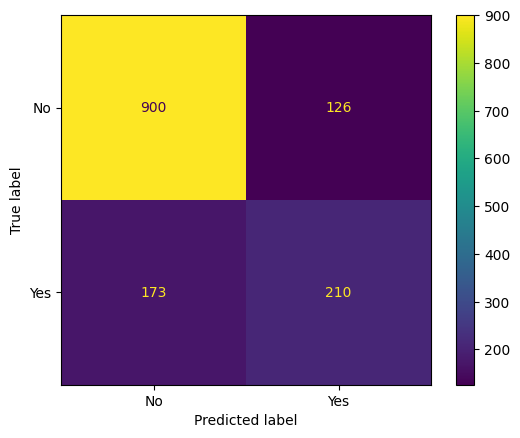

In [438]:
predict_and_paint(clf,y_test, encoded_x_test_less)

## ○ 2 gömda lager med 100 neuroner, learning rate 0.00001

### Med alla attribut:

In [439]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.00001,random_state=42).fit(encoded_x_train,y_train)

### Träningen av denna tog 15.3s.

In [440]:
clf.score(encoded_x_test,y_test)

0.7955997161107168

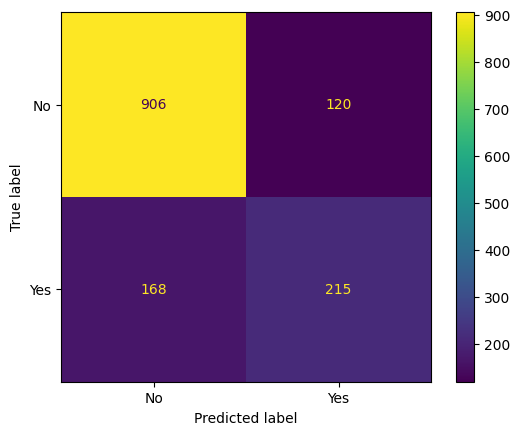

In [441]:
predict_and_paint(clf,y_test, encoded_x_test)

### Med minskat antal attribut:

In [442]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.00001,random_state=42).fit(encoded_x_train_less,y_train)
clf.score(encoded_x_test_less,y_test)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7877927608232789

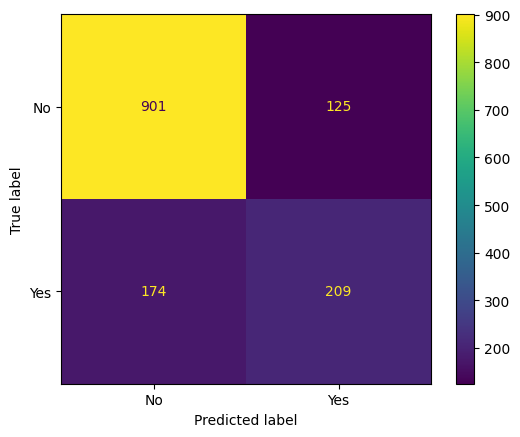

In [443]:
predict_and_paint(clf,y_test, encoded_x_test_less)

### Om man börjar med att försöka förklara tidsskillnaden det tar genom att se närmare på dom tre modeller som vi tränat som har två gömda lager och 100 neuroner i sig fast med olika learning_rate 0.01, 0.0001 och 0.00001 då dom har hidden_layer_sizes gemensamt så kan vi se att deras tider ökar med hur liten learning_raten är. Detta eftersom att modellen tar större steg när det är ett högre värde och därför så nöjer den sig snabbare, men sedan så blir ju inte tidsskillnaden mellan 0.0001, 0.00001 så stor och det är eftersom att den når sin maxgräns av iterationer konstigt nog enbart på den med 0.0001, om något så skulle jag trott att det var tvärtom eller att båda skulle ge upp tidigt men pågrund utav detta så verkar det som att dom kör ungefär lika länge men eftersom att då den med 0.0001 slutar tidigt men tar lika lång tid som den med 0,00001 så borde den senare av dom tagit ännu längre tid på sig om den inte hade varit nöjd tidigt.

### Om vi sedan går in på tidsskillnaden mellan dom två modeller som har 100st neuroner och 0.01 i learning_rate men en av dom har 2st gömda lager och den andra har 10st så ser vi att tiden ökar ju fler gömda lager vi har. Som vi ser så ökar det i vårt fall på nästan 10sekunder till 30 sekunder när man då går från 2 till 10 gömda lager.

### En intressant observation iom att jag använde MinMaxScaler är att om jag inte använder den utan jag kör datan som det är så får jag ungefär samma score för samtliga modeller men den får betydligt sämre prediktioner på dom som är klassade att lämna i dom första två modeller. Om man kollar då på skillnaden i parametrarna så har den färre neuroner och högre learning rate om man jämför med senare modeller, så det kan vara så att den inte hinner bli tränad tillräckligt länge för att göra bra prediktioner, kollar man på dens score som absolut är ganska högt så är ju detta för att största delen av datasetet består av 'yes' target som den verkar vilja klassificera för fulla muggar.

### Ytterliggare en observation som har med mitt test med att minska attributen att göra är att för dom modeller vi skulle testa så fick 4/5 bättre score än att använda alla attribut och sedan 3/5 klassade flera rätt på att en kund skulle lämna. Detta kan då eftersom att resultatet inte blir sämre utan nästan rentav bättre i många fall eller åtminstone likvärdigt även hjälpa tidsåtgången för träningen, detta var inget jag märkte någon större skillnad på nu men kanske om man hade ett väldigt stort dataset.

### Först delar vi upp original träningsdatan i validering och träningsdataset, eftersom att vi vill få fram opartiska bästa parametrar för modellen.

In [444]:
x_train, x_validation, y_train, y_validation = train_test_split(encoded_x_train,y_train, test_size=0.3, random_state=42)

In [445]:
layer_size = [5,10,20,40,60,80,100]
layer_count = [2,4,6,8,10]
learning_rate_init = [0.001,0.0001,0.00001]
activation= ['logistic', 'tanh','relu']
learning_rate=['adaptive','constant','invscaling']

best_score = 0

layer_counts = []
import random
for x in range(10):
    for y in layer_count:
        layer = []
        for i in range(y):
            number = random.choice(layer_size)
            layer.append(number)
        layer_counts.append(layer)

print(layer_counts)

# for ls in layer_size:
for a in activation:
    for lr in learning_rate:
        for lc in layer_counts:
            for lri in learning_rate_init:
                clf = MLPClassifier(hidden_layer_sizes=lc,
                                    learning_rate_init=lri,
                                    learning_rate= lr,
                                    activation=a,
                                    max_iter=300,
                                    random_state=42
                                    ).fit(x_validation,y_train)
                score = clf.score(x_test,y_test)
                # score = clf.score(encoded_x_test,y_test)
                if score > best_score:
                    print(F'Layer_count: {lc}, Lerarning_rate_init: {lri},Learning_rate: {lr}, Activation: {a} Score: {score}')
                    best_score = score

In [484]:
clf = MLPClassifier(hidden_layer_sizes=[60, 20, 80, 100],learning_rate_init=0.001,random_state=42, activation='relu',max_iter=300,early_stopping=True,learning_rate='adaptive').fit(encoded_x_train,y_train)

In [485]:
clf.score(encoded_x_test,y_test)

0.8097941802696949

In [482]:
clf = MLPClassifier(hidden_layer_sizes=[5,5,5,60],learning_rate_init=0.001,random_state=42, activation='logistic',max_iter=300,learning_rate='adaptive').fit(encoded_x_train,y_train)

In [483]:
clf.score(encoded_x_test,y_test)

0.8005677785663591

In [475]:
clf = MLPClassifier(hidden_layer_sizes=[60, 20, 80, 100],learning_rate_init=0.001,random_state=42, activation='relu',max_iter=300,early_stopping=True, learning_rate='adaptive').fit(encoded_x_train_less,y_train)

In [476]:
clf.score(encoded_x_test_less,y_test)

0.7970191625266146